# AIMS RW: Numerical Linear Algebra - Assignment 2
Below is an implementation of Algorithm GEPP. You may want to have a look at the code to make sure you understand how it works before moving on to the exercises.

In [50]:
# Implementation of Algorithm GEPP.

import numpy as np

# Using forwardsub and backsub from week 3.

def FS(L, b):
    # Find dimension of L
    n = L.shape[0]
    
    # Initialise y to zero vector of correct length
    y = np.zeros(n)
    
    # loop over elements of y, starting from first one
    for j in range(n):
        y[j] = (b[j] - L[j, :j] @ y[:j]) / L[j, j] # compute y_j
        
    return y

def BS(U, y):
    # Find dimension of U
    n = U.shape[0]
    
    # Initialise x to zero vector of correct length
    x = np.zeros(n)
    
    # loop over elements of x, starting from last one
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - U[j, j+1:] @ x[j+1:]) / U[j, j] # compute x_j
    
    return x

# New implementation of Algorithm LUPP

def LUPP(A):
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise matrices L=I, U=A, P=I
    L = np.eye(n)
    U = np.copy(A)
    P = np.eye(n)
    
    for k in range(n - 1): # Loop over columns 0 to n-2
        
        # Find pivot i
        i = np.argmax(np.abs(U[k:, k])) # Find position of maximum entry in required range
        i += k # Shift index to start counting from row 0
        
        # Swap rows correspondingly
        if i != k:
            # swap rows in U, columns k to n
            U[[k, i], k:] = U[[i, k], k:]
            
            # swap rows in L, columns 1 to k-1
            L[[k, i], :k] = L[[i, k], :k]
            
            # swap rows in P
            P[[k, i], :] = P[[i, k], :]
        
        # Loop over rows and make entries below
        # diagonal in column k equal to 0
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k, k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k from row j
        
    return L, U, P

def GEPP(A, b):
    L, U, P = LUPP(A) # find LU factorisation with permuation of A
    y = FS(L, P @ b) # solve Ly=Pb using forward substitution
    x = BS(U, y) # solve Ux=y using back substitution
    return x

# Test the functions
A = np.array([[2, 1, 1], [4, 3, 3], [8, 7, 9]], dtype=float)
b = np.array([4, 10, 24], dtype=float)
x = GEPP(A, b)
print('x = {}'.format(x))

x = [1. 1. 1.]


---

### Exercise 3 

You may wish to use functions you have written in previous workshops and/or functions that were presented in lectures.

For $n=50 \times 2^k$ with $k=1, 2, \dots, 5$:

(i) Set up a random matrix `A` of dimension $n$.

(ii) Create a vector `xsol` to represent a vector $x^{\ast} \in \mathbb{R}^n$, all of whose entries are $1$.

(iii) Compute the vector `b` such that $b = Ax^\ast$.

(iv) Use Algorithm GE to solve $Ax=b$, and store the solution in the variable `x1`. Take note of the elapsed time, as well as the $\infty-$norm of the residual `A @ x1 - b` and the error `xsol - x1`. 

(v) Use Algorithm GEPP to solve $Ax=b$, and store the solution in the variable `x2`. Take note of the elapsed time, as well as the $\infty-$norm of the residual `A @ x2 - b` and the error `xsol - x2`.

How do the elapsed times of the two algorithms compare? Is this what you expected? Do you notice any trends with n?

How do the norms of the residual and the error compare? Is this what you expected? Do you notice any trends with n?

In [51]:
import numpy as np
import time

#Definition of a function LU which factorise A

def LU(A):
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1):                           # loop over columns 1 to n-1
        for j in range(k + 1, n):                    # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k]              # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k from row j
    
    return L, U



#Definition of a function GE which solves Ax=b 

def GE(A, b):
    L, U = LU(A)                                   # find LU factorisation of A
    y = FS(L, b)                                   # solve Ly=b using forward substitution
    x = BS(U, y)                                   # solve Ux=y using back substitution
    return x                                       # Return the solution x of Ax=b




t_GE=[]                                            #Initialise list containing time elapsed using GE method
#sol_GE=[]                                         #Initialise list containing solutions using GE method
t_GEPP=[]                                          #Initialise list containing time elapsed using GEPP method
#sol_GEPP=[]                                       #Initialise list containing solutions using GEPP method

ResGE=[]                                           #Initialise list containing the inf-norm  of residual using GE method
ResGEPP=[]                                         #Initialise list containing the inf-norm of residual using GEPP method

SolErrGE=[]                                        #Initialise list containing the inf-norm of solution errors using GE method
SolErrGEPP=[]                                      #Initialise list containing the inf-norm of solution errors using GEPP method

#Loop over values of k

for k in range(1,6):                               
    n = 50*2**k                                     #Define n
    A = np.random.rand(n,n)                         #Define a random matrix A of dimension n
    xsol = np.ones(n)                               #Create a vector xsol which represent a vector x* of size n, all of whose entries are 1
    b = A@xsol                                      #Compute b such that b=Ax*
    
    
    x1 = GE(A,b)                                    #Using GE function to solve Ax=b and storing the solution in x1
    #x1.append(sol_GE)                              #Appending each solution for GE in their list sol_GE
    
    #Computing the elapsed time using GE method
    
    t01 = time.time()
    x1 = GE(A, b)
    t1 = time.time() - t01
    t_GE.append(t1)
    
    res1 = np.linalg.norm(A@x1-b,np.inf)             #Compute the inf-norm of the residual using GE method
    sol_err1 = np.linalg.norm(xsol-x1,np.inf)        #Compute the inf-norm of the solution error using GE method                              
    ResGE.append(res1)                               #Appending each residual  for GE in their list ResGE
    SolErrGE.append(sol_err1)                        #Appending each solution error for GE in their list SolErrGE
    
    
    x2 = GEPP(A,b)                                   #Using GEPP function to solve Ax=b and storing the solution in x1
    #x2.append(sol_GEPP)                             #Appending each solution for GEPP in their list sol_GEPP
    
    #Computing the elapsed time using GEPP method
    
    t02 = time.time()
    x2 = GEPP(A, b)
    t2 = time.time() - t02
    t_GEPP.append(t2)
    
    res2 = np.linalg.norm(A@x2-b,np.inf)            #Compute the inf-norm of the residual using GEPP method
    sol_err2 = np.linalg.norm(xsol-x2,np.inf)       #Compute the inf-norm of the solution error using GEPP method                              
    ResGEPP.append(res2)                            #Appending each residual error for GEPP in their list ResGEPP
    SolErrGEPP.append(sol_err2)                     #Appending each solution error for GEPP in their list SolErrGEPP

    
#print('sol_GE = ', sol_GE)
#print('sol_GE = ', sol_GE)
print()
print('t_GE = ', t_GE)                              #Print the list containing time elapsed using GE method
print('t_GEPP = ', t_GEPP)                          #Print the list containing time elapsed using GEPP method
print()
print('ResGE = ', ResGE)                            #Print the list containing the inf-norm  of residual using GE method
print('ResGEPP = ', ResGEPP)                        #Print the list containing the inf-norm  of residual using GEPP method
print()
print('SolErrGE = ', SolErrGE)                      #Print the list containing the inf-norm  of solution errors using GE method
print('SolErrGEPP = ', SolErrGEPP)                  #Print the list containing the inf-norm  of solution errors using GEPP method
    
# add code here


t_GE =  [0.02895045280456543, 0.049288034439086914, 0.20182180404663086, 0.889509916305542, 4.260830640792847]
t_GEPP =  [0.024074554443359375, 0.09510517120361328, 0.2640254497528076, 0.9573357105255127, 4.347942590713501]

ResGE =  [6.139089236967266e-12, 2.715694336075103e-11, 7.779021871101577e-11, 5.113633960718289e-10, 3.264062797825318e-09]
ResGEPP =  [3.552713678800501e-14, 9.947598300641403e-14, 2.5579538487363607e-13, 9.094947017729282e-13, 2.5011104298755527e-12]

SolErrGE =  [1.0360379221197036e-11, 2.6851298962071724e-10, 8.110290217189231e-11, 5.946709791260218e-10, 8.460344425031963e-09]
SolErrGEPP =  [4.0745185003743245e-14, 1.1552980794249379e-12, 8.537615059367454e-13, 1.1127765375817944e-12, 1.3959833289334256e-11]


#### Comment below

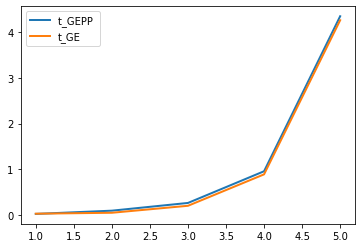

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),t_GEPP , label ="t_GEPP ", linewidth=2)
plt.plot(range(1,6),t_GE , label ="t_GE", linewidth=2)
plt.legend()
plt.show()

In [53]:
print('Difference between t_GEPP and t_GE is : ',[t_GEPP[i]-t_GE[i] for i in range(5)])

Difference between t_GEPP and t_GE is :  [-0.004875898361206055, 0.04581713676452637, 0.06220364570617676, 0.0678257942199707, 0.0871119499206543]


#### Comment about the time of the both algorithm

Since the difference t_GEPP and t_GE is positive and according to the graph, this means that the time to execute GEPP is greater than the one to execute GE. So, the cost to execute GEPP is greater than the one of GE, which is exactly what we expected since GEPP uses the pivot in addition of GE.

$\underline{Note:}$ When $n\to +\infty$, this extra cost is negligeable and the both time tend to infinity.

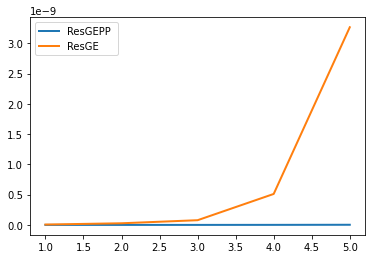

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),ResGEPP , label ="ResGEPP ", linewidth=2)
plt.plot(range(1,6),ResGE , label ="ResGE ", linewidth=2)
plt.legend()
plt.show()

In [34]:
print('Difference between ResGEPP and ResGE is : ',[ResGEPP[i]-ResGE[i] for i in range(5)])

Difference between ResGEPP and ResGE is :  [-4.050093593832571e-13, -6.849631972727366e-12, -5.900346877751872e-11, -7.922835720819421e-10, -3.0196360967238434e-09]


#### Comment about residuals of the both algorithm

Since the difference ResGEPP and ResGE is negative, this means that the residual in GEPP is less than the one in GE, the lost is less significant in GEPP than in GE. Which is exaclty what we expected since GEPP is an improvment of GE.

$\underline{Note:}$ When $n\to +\infty$, the residual of the GEPP method tends to zero while the one of GE tends to infinity.

In [55]:
print('Difference between SolErrGEPP and SolErrGE is : ',[SolErrGEPP[i]-SolErrGE[i] for i in range(5)])

Difference between SolErrGEPP and SolErrGE is :  [-1.0319634036193293e-11, -2.673576915412923e-10, -8.024914066595557e-11, -5.935582025884401e-10, -8.446384591742628e-09]


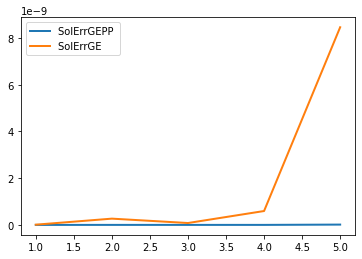

In [56]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),SolErrGEPP , label ="SolErrGEPP ", linewidth=2)
plt.plot(range(1,6),SolErrGE , label ="SolErrGE ", linewidth=2)
plt.legend()
plt.show()

#### Comment about solution errors of the both algorithm

Since the difference SolErrGEPP and SolErrGE is negative, this means that the error gives by GEPP is less than the one gives by GE. So, the solution from GEPP is more close to the exact solution than the one of GE, which is exaclty what we expected since GEPP is an improvment of GE.

$\underline{Note:}$ When $n\to +\infty$, the the error solution of GEPP tends to 0 while the one of GE tends to infinity